In [27]:
import pyvisa
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

In [30]:
rm = pyvisa.ResourceManager()
print(rm.list_resources())

('USB0::0x0699::0x03A6::C018103::INSTR', 'ASRL1::INSTR')


In [31]:
oscilloscope = rm.open_resource(rm.list_resources()[0])
print(oscilloscope.query('*IDN?'))

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).

Here I'll give examples of other SCPI commands for the tektronix oscilloscope 2024C.
A comprehensive list is available at https://download.tek.com/manual/TBS1000-B-EDU-TDS2000-B-C-TDS1000-B-C-EDU-TDS200-TPS2000-Programmer.pdf

In [4]:
oscilloscope.query('MEASUrement:IMMed?')

'MEAN;"V";CH1\n'

In [5]:
oscilloscope.write('MEASUrement:IMMed:SOUrce CH1')
oscilloscope.write('MEASUrement:IMMed:TYPe MEAN')

29

In [82]:
a = []
for i in range(20):
    a.append(float(oscilloscope.query('MEASUrement:IMMed:VALue?').strip()))

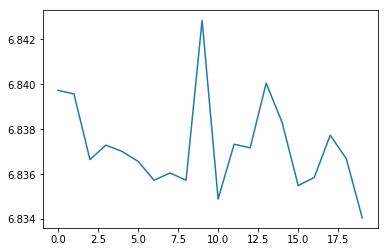

In [84]:
data = np.array(a)
plt.plot(data)
plt.show()

In [19]:
oscilloscope.query('CURV?')

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).